# 1. Viewing an image from the IDR (practical)

***

**ELMI 2021 NGFF Workshop**, 25 June 2021

***


## Summary

* 1.1 Diagram from poster
* 1.2 Example of loading a multi-resolution Zarr image
* 1.3 Vizarr
* 1.4+ Details!


## 1.1 Diagram from poster

In [1]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def show_poster(size=300):
    if size < 0: size=10
    from IPython.display import Image
    display(Image(url='images/diagram.png', width=size))

interactive(children=(IntSlider(value=300, description='size', max=900, min=-300), Output()), _dom_classes=('w…

## 1.2 Example of loading a multi-resolution Zarr image from a public S3 repository

OME-Zarr is a developing open standard for imaging from the OME community. The Imaging Data Resource (IDR) has provided several images in this experimental format which are publically available.

The images are taken from  the paper "SARS-CoV-2 productively Infects Human Gut Enterocytes" published May 2020 in Science: https://doi.org/10.1126/science.abc1669

The electron micrograph images can be viewed online in the [Image Data Resource](https://idr.openmicroscopy.org/webclient/?show=dataset-10201). Both images are over 13 gigapixels each!
- [hSIOs-1 (79360 x 167424 px, image ID 9822151)](https://idr.openmicroscopy.org/webclient/img_detail/9822151/?dataset=10201)
- [hSIOs-2 (144384 x 93184 px, image ID 9822152)](https://idr.openmicroscopy.org/webclient/img_detail/9822152/?dataset=10201)

This viewer is [vizarr](https://github.com/hms-dbmi/vizarr) from the [Gehlenborg lab](http://gehlenborglab.org/) at Harvard Medical School. It can be accessed at https://hms-dbmi.github.io/vizarr for example to access data from the IDR: [link](http://hms-dbmi.github.io/vizarr/v0.1?source=https%3A%2F%2Fs3.embassy.ebi.ac.uk%2Fidr%2Fzarr%2Fv0.1%2F9822151.zarr).

## 1.3 Vizarr

In [2]:
from IPython.display import IFrame
IFrame("https://hms-dbmi.github.io/vizarr/v0.2/?source=https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/9822151.zarr", width=600, height=800)

In [3]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def show_poster(size=800):
    if size < 0: size=10
    from IPython.display import Image
    display(Image(url='images/inspect.png', width=size))

interactive(children=(IntSlider(value=800, description='size', max=2400, min=-800), Output()), _dom_classes=('…

##  1.4 Other browsers

### [MoBIE (FIJI)](https://youtu.be/iBrKyO0r4r8)

In [4]:
from IPython.display import IFrame
video="iBrKyO0r4r8"
IFrame(f'https://www.youtube.com/embed/{video}?autoplay=1&mute=1&loop=1&playlist={video}&showinfo=0',
       allow='autoplay', width="560", height="315")

### [napari](https://youtu.be/EQg7YfcTpKo)

In [5]:
from IPython.display import IFrame
video="EQg7YfcTpKo"
IFrame(f'https://www.youtube.com/embed/{video}?autoplay=1&mute=1&loop=1&playlist={video}&showinfo=0',
       allow='autoplay', width="560", height="315")

## Dask

In [6]:
import dask.array as da
z = da.from_zarr("https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/9822151.zarr/0")
z.view()

,Array,Chunk
Bytes,24.75 GiB,2.00 MiB
Shape,"(1, 1, 1, 167424, 79360)","(1, 1, 1, 1024, 1024)"
Count,25585 Tasks,12792 Chunks
Type,>u2,numpy.ndarray


In [7]:
from IPython.display import Image
z = da.from_zarr("https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/9822151.zarr/6")
z.view()

dask.array<view, shape=(1, 1, 1, 2616, 1240), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

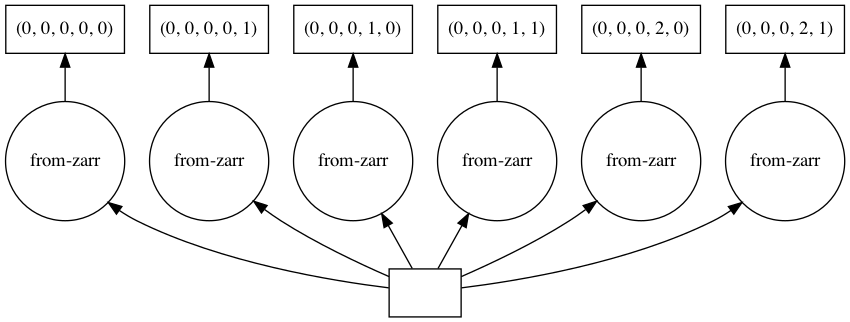

In [8]:
z.visualize("/tmp/dask.png")
display(Image("/tmp/dask.png"))

## 1.4 Introduction to Zarr and OME-Zarr

Zarr is a format for the storage of chunked, compressed, N-dimensional arrays.
Arrays can be organised into hierarchical groups with associated metadata. We are working on [OME-zarr](https://ngff.openmicroscopy.org/), a specification for how to represent Images, HCS Plates, ROIs and other data in Zarr format.


### Arrays

Zarr arrays are stored as a directory that contains binary 'chunks' of data and a JSON file `.zarray` that specifies the chunks metadata. For example: 

```
# .zarray
{
    "chunks": [
        1,
        1,
        1,
        256,
        336
    ],
    "compressor": {
        "blocksize": 0,
        "clevel": 5,
        "cname": "lz4",
        "id": "blosc",
        "shuffle": 1
    },
    "dtype": "<i8",
    "fill_value": 0,
    "filters": null,
    "order": "C",
    "shape": [
        1,
        1,
        1,
        1024,
        1344
    ],
    "zarr_format": 2
}
```
Chunks are named according to their index in the N-dimensional array. For example, in the 5D array above, chunks would be named:

```
# chunks of 5D array
0.0.0.0.0
0.0.0.0.1
0.0.0.0.2
0.0.0.0.3
0.0.0.1.0
0.0.0.1.1
...
```

## Groups

Zarr groups are directories that contain arrays or other groups, and a JSON file `.zattrs` that contains data about the group and it's contents.


# OME zarr

## Images

In OME zarr, Images are represented by a group with `multiscales` metadata. It may also contain `omero` metadata if available. The `multiscales` section will list 1 or more multiscale `datasets`, with a `path` to each zarr 5D `array` at different resolutions. Array dimensions are Time, Channel, Z, Y, X (`t.c.z.y.x`).

```
# image.zarr/.zattrs
{
    "multiscales": [
        {
            "datasets": [
                {
                    "path": "0"             # Path to Array containing full-size Image
                },
                {
                    "path": "1"             # Path to Array containing sub-resolution Image
                },
                {
                    "path": "2"             # Path to Array containing sub-resolution Image
                }
            ],
            "version": "0.1"
        }
    ],
    "omero": {
        "channels": [
            {
                "active": true,
                "coefficient": 1.0,
                "color": "0000FF",
                "family": "linear",
                "inverted": false,
                "label": "DAPI",
                "window": {
                    "end": 1500.0,
                    "max": 65535.0,
                    "min": 0.0,
                    "start": 0.0
                }
            }
        ],
        "id": 1,
        "rdefs": {
            "defaultT": 0,
            "defaultZ": 0,
            "model": "color"
        }
    }
}
```

Each Image array is found under the specified `path`, e.g. for `"path": "0"`:

```
# image.zarr/0/
.zarray
0.0.0.0.0
0.0.0.0.1
0.0.0.1.0
0.0.0.1.1
...
```

## Loading sample OME zarr Images

A list of example Images (from the IDR), converted to `OME zarr` and hosted at https://s3.embassy.ebi.ac.uk is available at https://blog.openmicroscopy.org/file-formats/community/2020/11/04/zarr-data/. You can 'copy' links to Images from the table.

In [9]:
import dask.array as da
import numpy as np
from IPython.display import display, Image
from matplotlib import pyplot as plt
import requests
import zarr

In [10]:
imagepath = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/9822151.zarr"

In [11]:
# Load the top-level .zattrs Image metadata
zattrs = requests.get(f'{imagepath}/.zattrs').json()
# Get the path for each resolution of the first multiscale dataset  
resolutions = [d['path'] for d in zattrs['multiscales'][0]['datasets']]

darrays = []
for resolution in resolutions:
    print(f'Resolution: "{resolution}"')
    # Create a 'dask' array (like numpy array but with lazy loading of data)
    array_5d = da.from_zarr(f'{imagepath}/{resolution}')
    darrays.append(array_5d)
    display(array_5d)

Resolution: "0"


,Array,Chunk
Bytes,24.75 GiB,2.00 MiB
Shape,"(1, 1, 1, 167424, 79360)","(1, 1, 1, 1024, 1024)"
Count,12793 Tasks,12792 Chunks
Type,>u2,numpy.ndarray


Resolution: "1"


,Array,Chunk
Bytes,6.19 GiB,2.00 MiB
Shape,"(1, 1, 1, 83712, 39680)","(1, 1, 1, 1024, 1024)"
Count,3199 Tasks,3198 Chunks
Type,>u2,numpy.ndarray


Resolution: "2"


,Array,Chunk
Bytes,1.55 GiB,2.00 MiB
Shape,"(1, 1, 1, 41856, 19840)","(1, 1, 1, 1024, 1024)"
Count,821 Tasks,820 Chunks
Type,>u2,numpy.ndarray


Resolution: "3"


,Array,Chunk
Bytes,395.98 MiB,2.00 MiB
Shape,"(1, 1, 1, 20928, 9920)","(1, 1, 1, 1024, 1024)"
Count,211 Tasks,210 Chunks
Type,>u2,numpy.ndarray


Resolution: "4"


,Array,Chunk
Bytes,98.99 MiB,2.00 MiB
Shape,"(1, 1, 1, 10464, 4960)","(1, 1, 1, 1024, 1024)"
Count,56 Tasks,55 Chunks
Type,>u2,numpy.ndarray


Resolution: "5"


dask.array<from-zarr, shape=(1, 1, 1, 5232, 2480), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "6"


dask.array<from-zarr, shape=(1, 1, 1, 2616, 1240), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "7"


dask.array<from-zarr, shape=(1, 1, 1, 1308, 620), dtype=>u2, chunksize=(1, 1, 1, 1024, 620), chunktype=numpy.ndarray>

Resolution: "8"


dask.array<from-zarr, shape=(1, 1, 1, 654, 310), dtype=>u2, chunksize=(1, 1, 1, 654, 310), chunktype=numpy.ndarray>

Resolution: "9"


dask.array<from-zarr, shape=(1, 1, 1, 327, 155), dtype=>u2, chunksize=(1, 1, 1, 327, 155), chunktype=numpy.ndarray>

Resolution: "10"


dask.array<from-zarr, shape=(1, 1, 1, 163, 77), dtype=>u2, chunksize=(1, 1, 1, 163, 77), chunktype=numpy.ndarray>

Display the smallest resolution image. In this image `T`, `C`, `Z` are all singleton dimensions.

(163, 77)


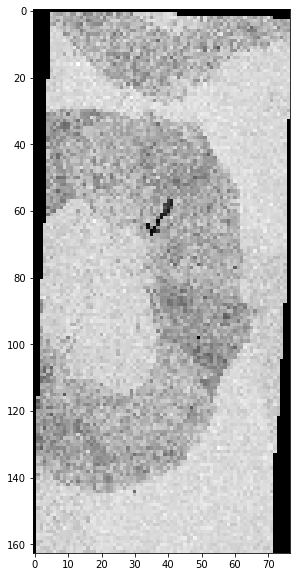

In [12]:
array_5d = darrays[-1]
array_2d = array_5d[0, 0, 0, :, :]
print(array_2d.shape)
plt.figure(figsize=(10, 10))
plt.imshow(array_2d, cmap='gray')

As you can see it very low resolution, so let's look at the 3rd smallest resolution instead.

(654, 310)


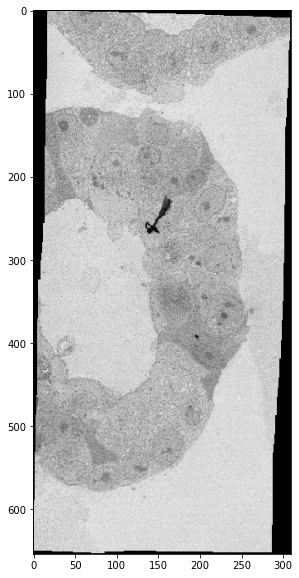

In [13]:
array_5d = darrays[-3]
array_2d = array_5d[0, 0, 0, :, :]
print(array_2d.shape)
plt.figure(figsize=(10, 10))
plt.imshow(array_2d, cmap='gray')

Now "zoom in" to the centre of image by showing the same number of pixels but at the next resolution up

resolution: 10, cy: 81, cx: 38


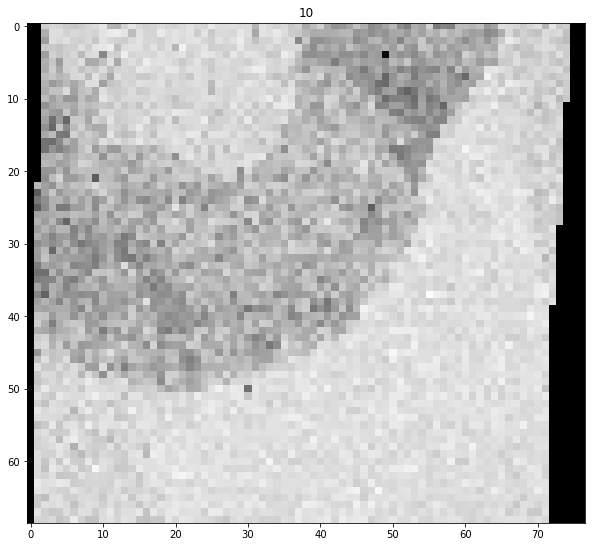

resolution: 9, cy: 163, cx: 77


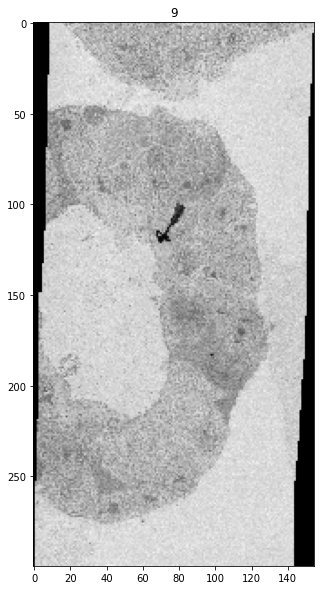

resolution: 8, cy: 327, cx: 155


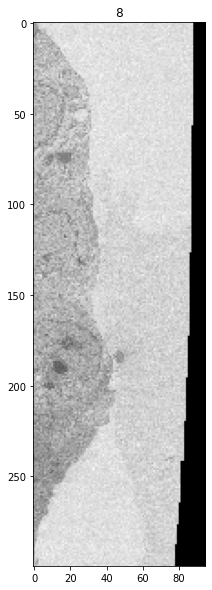

resolution: 7, cy: 654, cx: 310


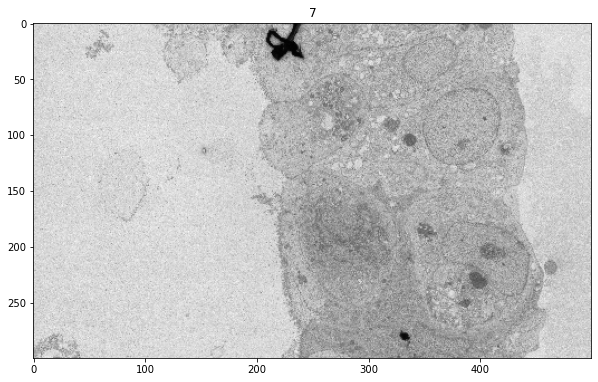

resolution: 6, cy: 1308, cx: 620


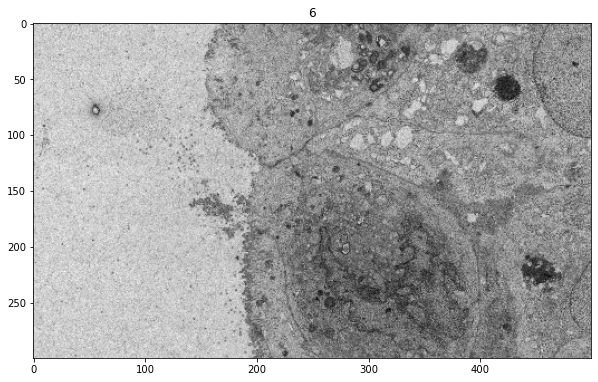

resolution: 5, cy: 2616, cx: 1240


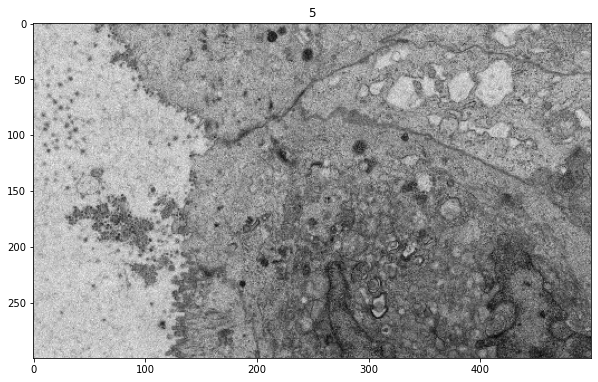

resolution: 4, cy: 5232, cx: 2480


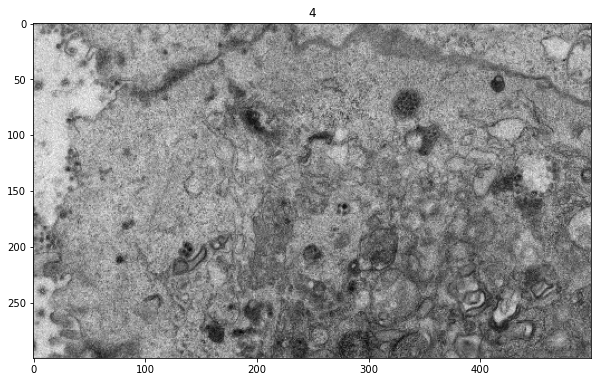

resolution: 3, cy: 10464, cx: 4960


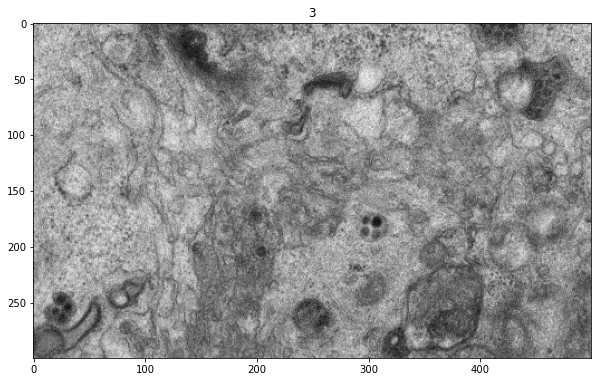

resolution: 2, cy: 20928, cx: 9920


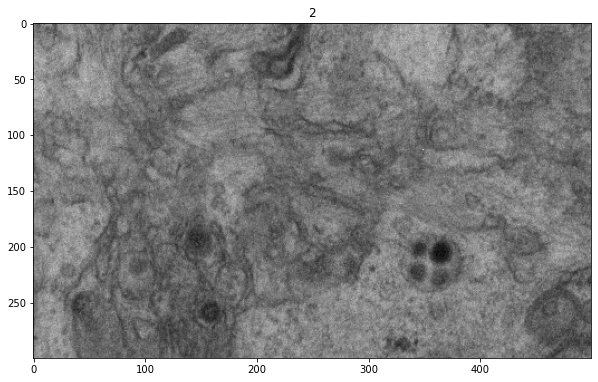

resolution: 1, cy: 41856, cx: 19840


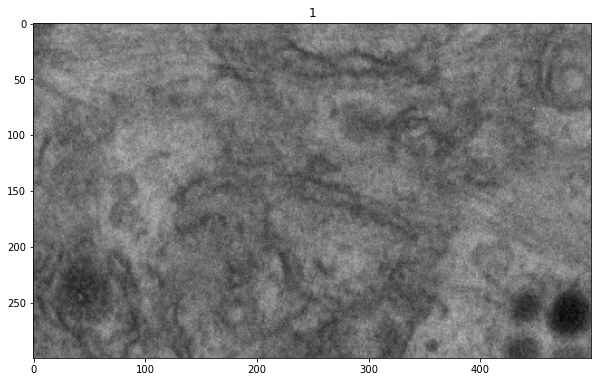

resolution: 0, cy: 83712, cx: 39680


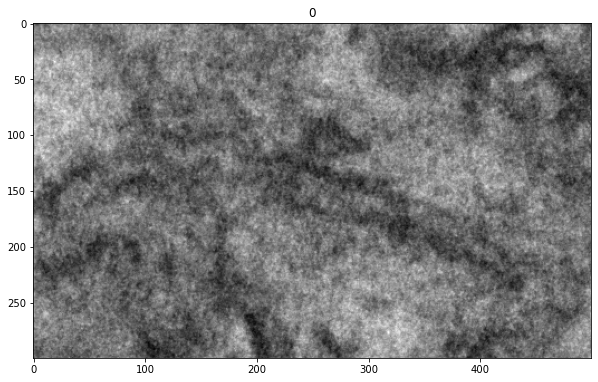

In [14]:
# size of the region we want to show
rwidth = 500
rheight = 300

# load a region for each level, from smallest to largest 
levels = range(len(darrays))
for level in reversed(levels):
    array_5d = darrays[level]
    array_2d = array_5d[0, 0, 0, :, :]
    # We want to show the centre-point of each level
    cy, cx = int(array_2d.shape[0] / 2), int(array_2d.shape[1] / 2)
    print(f'resolution: {level}, cy: {cy}, cx: {cx}')
    # Crop the dask array - still doesn't load remote data yet
    y1 = cy - (rheight/2)
    y2 = cy + (rheight/2)
    x1 = cx - (rwidth/2)
    x2 = cx + (rwidth/2)
    region = array_2d[y1:y2, x1:x2]
    plt.figure(figsize=(10, 10))
    # Show the image - loading remote data
    plt.imshow(region, cmap='gray')
    plt.title(level)
    plt.show()

## Labels

Labels (or Masks) are pixel-based Regions of Interest, such as image segmentations. In OME zarr, labels are stored in a `labels` directory within the image.zarr directory. Labels are 5D zarr arrays corresponding to the shape of the parent image, with background values of `0` and each label represented by a different pixel value.

Multiple `arrays` of labels can be stored under the labels group, as defined in the `labels/.zattrs` JSON:

```
# image.zarr/labels/.zattrs

{
    "labels": [
        "0"
    ]
}
```

This indicates a labels array at `image.zarr/labels/0/`.




In [15]:
imagepath = 'https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/2551.zarr/A/1/0'
zattrs = requests.get(f'{imagepath}/labels/.zattrs').json()
print('zattrs', zattrs)

label_path = zattrs['labels'][0]
labels_metadata = requests.get(f'{imagepath}/labels/{label_path}/.zattrs').json()
print('labels multiscales', labels_metadata['multiscales'])

zattrs {'labels': ['0']}
labels multiscales [{'datasets': [{'path': '0'}, {'path': '1'}, {'path': '2'}, {'path': '3'}, {'path': '4'}, {'path': '5'}], 'version': '0.1'}]


min_value: 632780, max_value: 632815


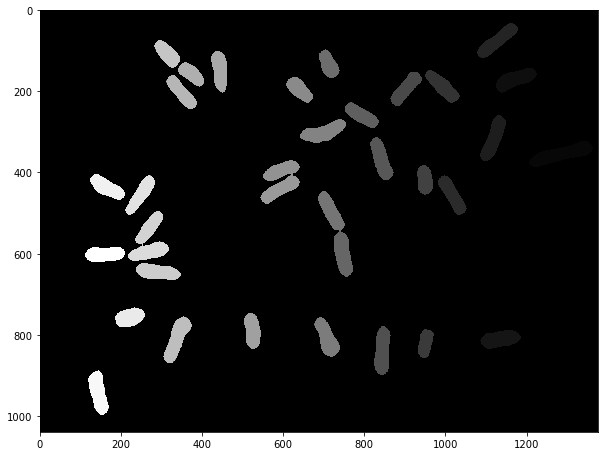

In [16]:
# As for 'image' we have a pyramid of 'multiscales' arrays
res = [d['path'] for d in labels_metadata['multiscales'][0]['datasets']]
labels_5d = da.from_zarr(f'{imagepath}/labels/{label_path}/{res[0]}')
labels_2d = labels_5d[0, 0, 0, :, :]

# load the dask array, so we can find max and min
labels_2d = labels_2d.compute()
max_value = labels_2d.max()
min_value = labels_2d[labels_2d > 0].min()   # min() ignoring 0 values
print(f'min_value: {min_value}, max_value: {max_value}')

# Render, scaling gray from min to max
plt.figure(figsize=(10, 10))
plt.imshow(labels_2d, cmap='gray', vmin=min_value, vmax=max_value)
plt.show()

Labels metadata

Metadata for labels can be stored within an `image-label` object in each labels `.zattrs`. The labels are identified by the `label-value`, which is the pixel value of the corresponding label. Currently the defined keys are `colors` and `properties`, which may be used for storing custom properties for each label:

```
# image.zarr/labels/0/.zattrs

{
  "multiscales": [
    # as for images above
  ],
  "image-label":
    {
      "version": "0.1",
      "colors": [
        {
          "label-value": 732780,
          "rgba": [255, 255, 255, 0]
        },
        {
          "label-value": 732781,
          "rgba": [0, 255, 255, 128]
        },
        ...
        ]
      },
      "properties": [
        {
          "label-value": 732780,
          "text": "nucleus 1",
          "GFP intensity": 456.5
        },
        {
          "label-value": 732781,
          "text": "nucleas 2",
          "GFP intensity": 678.0
        },
        ...
        ]
      },
      "source": {
        "image": "../../"
      }
    }
}

```

## Plates - HCS Data

A Plate is a collection of Images with 1 or more Images (fields) in a Well into rows and columns. In OME-Zarr, this is represented as a hierarchy of groups: `plate/row_name/column_name/field_index/`.

The `.zattrs` at the top level will contain `plate` metadata to specify the row and column names and the wells in the plate (not every row/column position may contain a well):

```
# plate/.attrs

{
  "plate": {
    "name": "plate-name",
    "rows": [
        {
            "name": "A"
        },
        {
            "name": "B"
        }
    ],
    "columns": [
        {
            "name": "1"
        },
        {
            "name": "2"
        },
        {
            "name": "3"
        }
    ],
    "field_count": 4,
    "version": "0.1",
    "wells": [
        {
            "path": "A/1"
        },
        {
            "path": "A/2"
        },
        {
            "path": "B/1"
        },
        {
            "path": "B/3"
        }
    ]
  }
}

```



Sample HCS plates in OME-Zarr format are listed at https://blog.openmicroscopy.org/file-formats/community/2020/12/01/zarr-hcs/   

In [17]:
plate_url = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr"
# Alternative plate
# plate_url = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/2551.zarr"

# Load the top-level .zattrs Plate metadata
zattrs = requests.get(f'{plate_url}/.zattrs').json()
plate_metadata = zattrs['plate']
# Get the path to each well - NB: May not be sorted yet
well_paths = [w['path'] for w in plate_metadata['wells']]
well_paths.sort()
print(well_paths)

['A/1', 'A/10', 'A/11', 'A/12', 'A/2', 'A/3', 'A/4', 'A/5', 'A/6', 'A/7', 'A/8', 'A/9', 'B/1', 'B/10', 'B/11', 'B/12', 'B/2', 'B/3', 'B/4', 'B/5', 'B/6', 'B/7', 'B/8', 'B/9', 'C/1', 'C/10', 'C/11', 'C/12', 'C/2', 'C/3', 'C/4', 'C/5', 'C/6', 'C/7', 'C/8', 'C/9', 'D/1', 'D/10', 'D/11', 'D/12', 'D/2', 'D/3', 'D/4', 'D/5', 'D/6', 'D/7', 'D/8', 'D/9', 'E/1', 'E/10', 'E/11', 'E/12', 'E/2', 'E/3', 'E/4', 'E/5', 'E/6', 'E/7', 'E/8', 'E/9', 'F/1', 'F/10', 'F/11', 'F/12', 'F/2', 'F/3', 'F/4', 'F/5', 'F/6', 'F/7', 'F/8', 'F/9', 'G/1', 'G/10', 'G/11', 'G/12', 'G/2', 'G/3', 'G/4', 'G/5', 'G/6', 'G/7', 'G/8', 'G/9', 'H/1', 'H/10', 'H/11', 'H/12', 'H/2', 'H/3', 'H/4', 'H/5', 'H/6', 'H/7', 'H/8', 'H/9']


https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/1/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/10/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/11/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/12/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/2/0/4
data_5d.shape (329, 2, 1, 64, 84)


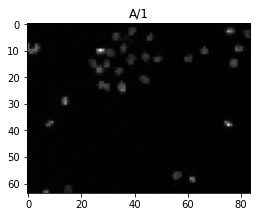

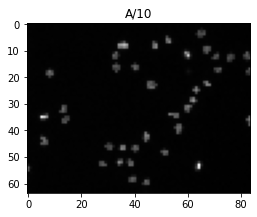

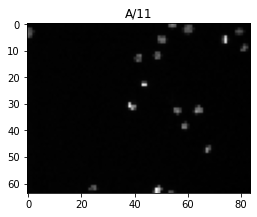

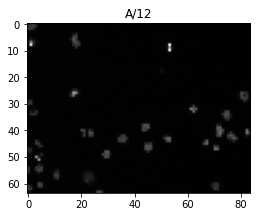

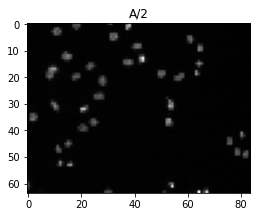

In [18]:
# We can assume at least 1 field (image) in each well
field = '0'
# Load metadata for first Well
image_metadata = requests.get(f'{plate_url}/{well_paths[0]}/{field}/.zattrs').json()
resolutions = [d['path'] for d in image_metadata['multiscales'][0]['datasets']]

# Show the lowest resolution, first ZCT plane of first 5 Wells
Z, C, T = (0, 0, 0)
resolution = resolutions[-1]
for path in well_paths[0:5]:
    print(f'{plate_url}/{path}/{field}/{resolution}')
    data_5d = da.from_zarr(f'{plate_url}/{path}/{field}/{resolution}')
    print('data_5d.shape', data_5d.shape)
    first_plane = data_5d[T, C, Z, :, :]
    plt.figure(figsize=(4, 4))
    plt.title(path)
    plt.imshow(first_plane, cmap='gray')

### License (BSD 2-Clause)

Copyright (c) 2021, University of Dundee All rights reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.